In [4]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from database import Database
from datetime import datetime, timedelta
import numpy as np; np.random.seed(42)
from matplotlib.collections import LineCollection
import dateutil.parser
db = Database()

In [5]:
start_date = '2021-09-01'
end_date = '2021-09-02'
from_date_str = start_date + "T00:00:00"
to_date_str = end_date + "T23:59:59"
from_date = datetime.strptime(from_date_str, '%Y-%m-%dT%H:%M:%S')
to_date = datetime.strptime(to_date_str, '%Y-%m-%dT%H:%M:%S')

data = db.get_all_data('Dagg_vehicle_type_preference', {'date': {'$gte': from_date, '$lt': to_date}}, {'_id': 0})
data_list = list(data)
df = pd.DataFrame(data_list)

df.head()
df.values
df['UTILITY'][0]

24

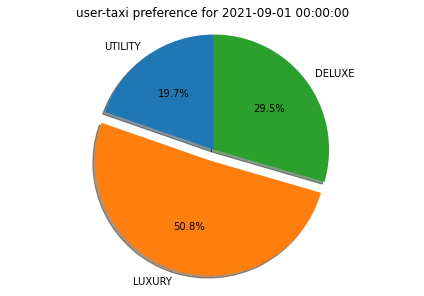

In [6]:
# Pie chart
labels = ['UTILITY', 'LUXURY', 'DELUXE']
sizes = [df['UTILITY'][0], df['LUXURY'][0], df['DELUXE'][0]]

# "explode" the 2nd slice 
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title(f'user-taxi preference for {df["date"][0]}')
plt.show()

In [7]:
curr_date = '2021-09-01T00:00:00.000'
end_date = '2021-09-30T00:00:00.000'
data = db.get_all_data('rides', {'start_time': {'$gte': curr_date, '$lt': end_date}},
                       {'_id': 0})
entries = list(data)
df = pd.DataFrame(entries)

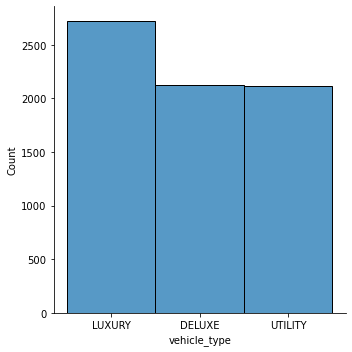

In [8]:
sns.displot(df, x='vehicle_type')